# Stock_Price_Preprocess

In this section, I used MSFT stock price data and NOK intraday price data as example for first stage data clean. It mainly involves date manipulation, period range setup and plotting.

* **Close Price**
* **Intraday Price**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
from datetime import datetime
from collections import OrderedDict
import time
import datetime
import os
%matplotlib inline

## Close Price 

The first step involves data loading. It should be noted that most of the time reading directly from Excel or csv would give us date in string format, which is not appropriate for date manipulation. Here I choose to convert it to datetime class from the Datetime package. Datetime package provides various ways to present date data. 

In [2]:
# set local file directory and read into pandas dataframe
os.chdir('/Users/RuitaoWang/Documents/Python/DataAnalysis')
MSFT = pd.read_csv('MSFT_Stock.csv')
MSFT_Div = pd.read_csv('MSFT_Div.csv')
# change the 'Date' column to Timestamp type.
MSFT_Div['Date'] = pd.to_datetime(MSFT_Div['Date'],format='%d/%m/%Y')
MSFT_Div = np.asarray(MSFT_Div)
MSFT['Date'] = pd.to_datetime(MSFT['Date'],format='%d/%m/%Y')
Date  = MSFT['Date'].map(lambda x: x.toordinal())
# Here we generate two array to seperately (ordinal value) hold date and price
Date = Date.values
Price = MSFT['Close'].values
Adj_Price = MSFT['Adj Close'].values

Next, I'd like to set our research time range. I chose to use the ordinal formatted data so mathematical operations can be more explicitly applied. 

The following code take two dates as inputs and would return the dataframe for this time period. If we chose an non-trading day, the code would automatically chose the nearest date as the start or ending date.

In [3]:
t_start = '5/10/2016'
t_end = '5/10/2015'
t_first_num = datetime.datetime.strptime(t_start, '%d/%m/%Y').toordinal() 
t_first_index = np.argmin(abs(Date - t_first_num))
t_last_num  = datetime.datetime.strptime(t_end, '%d/%m/%Y').toordinal();
t_last_index = np.argmin(abs(Date - t_last_num))
Date  = Date[t_first_index:t_last_index+1]
Price = Price[t_first_index:t_last_index+1]
Adj_Price = Adj_Price[t_first_index:t_last_index+1]

In [4]:
MSFT_Div[:,0] = np.array([x.toordinal() for x in MSFT_Div[:,0]])
Div_date = MSFT_Div[:,0]
DivIndex = np.in1d(Date, Div_date)
Date[DivIndex]

array([736192, 736101, 736010, 735919])

Next, let's plot the price and get some visual sense about the trend.

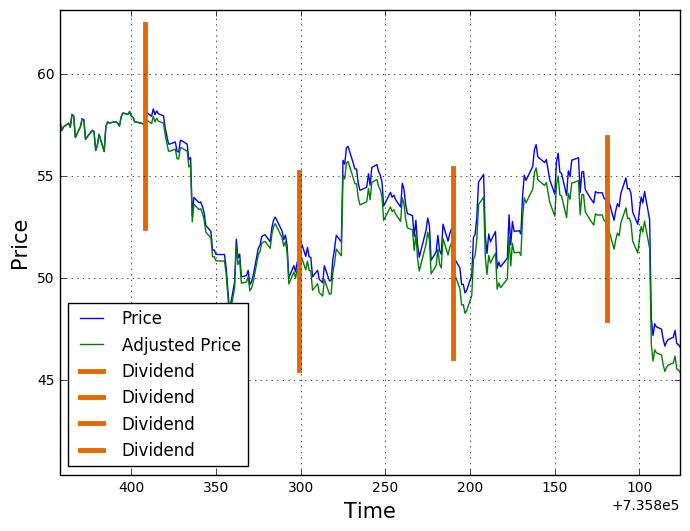

In [5]:
# Initiate the figure object
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(6)

# price and Adjusted price plot
xticks = np.hstack((Date[0],Date[DivIndex],Date[-1]))
plt.plot(Date, Price, label='Price')
plt.plot(Date, Adj_Price,label = 'Adjusted Price')
plt.plot([Date[DivIndex], Date[DivIndex]],[Price[DivIndex]-5, Adj_Price[DivIndex]+5], color = [0.9, 0.4, 0], linewidth = 3.5, label = "Dividend")
plt.xlabel("Time", size = 15)
plt.ylabel("Price", size = 15)
plt.xlim([Date[0], Date[-1]])
plt.ylim([min(min(Price),min(Adj_Price-5)), max(max(Price), max(Adj_Price+5))])
plt.grid()
plt.legend(loc='best')
# setup the legend

The origin bar represent for dividend paying.

## Intraday Price

In [6]:
# Choose a day and read data from that date
t = '27-05-2015'
NOK_intra = pd.read_excel('Nok_intraday.xlsx',sheetname=t)
NOK_intra.columns=['Time','Price']
NOK_intra.head()

,Time,Price
0,09:32:00,7.255
1,09:33:00,7.250
2,09:34:00,7.260
3,09:35:00,7.270
4,09:36:00,7.270


Now it comes with relatively different framework because we are dealing with time instead of date.

In [7]:
# number of observations
Time  = NOK_intra['Time'];
Price = NOK_intra['Price'];
t_ = len(Time)
# ticks and tickLabels
tick_array = np.arange(0,t_,np.floor(t_/5), dtype = 'int')
hour = [time.strftime('%I:%M %p') for time in Time[tick_array]]

Make the plot

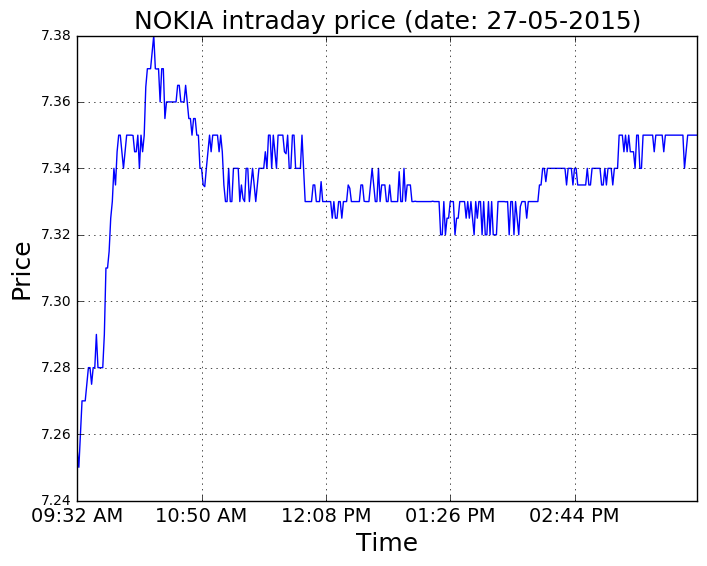

In [8]:
# setting the figure object
fig = plt.figure(figsize = (8,6))
fig.set_facecolor('white')
ax = plt.subplot(111)
ax.grid()
# set Time ticks (hours)
ax.set_xticks(tick_array)
ax.set_xticklabels(hour, size = 14)
# set Labels
ax.set_xlabel("Time", size = 18)
ax.set_ylabel("Price", size = 18)
ax.set_title("NOKIA intraday price (date: %s)" %t, size = 18)
# make the plot
ax.plot(Price)